<a href="https://colab.research.google.com/github/dcastf01/ATPBetting/blob/master/WTA_project_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Falta importar los datos de forma automatica

In [ ]:
#!wget https://github.com/edouardthom/ATPBetting/archive/master.zip
#!unzip WTA-master.zip
!unzip ATP_master.zip


Archive:  ATP_master.zip
   creating: ATPBetting-master/
  inflating: ATPBetting-master/.gitignore  
   creating: ATPBetting-master/.ipynb_checkpoints/
  inflating: ATPBetting-master/.ipynb_checkpoints/Beating the bookmakers on tennis matches-checkpoint.ipynb  
  inflating: ATPBetting-master/Beating the bookmakers on tennis matches.ipynb  
   creating: ATPBetting-master/Data/
  inflating: ATPBetting-master/Data/2000.xls  
  inflating: ATPBetting-master/Data/2001.xls  
  inflating: ATPBetting-master/Data/2002.xls  
  inflating: ATPBetting-master/Data/2003.xls  
  inflating: ATPBetting-master/Data/2004.xls  
  inflating: ATPBetting-master/Data/2005.xls  
  inflating: ATPBetting-master/Data/2006.xls  
  inflating: ATPBetting-master/Data/2007.xls  
  inflating: ATPBetting-master/Data/2008.xls  
  inflating: ATPBetting-master/Data/2009.xls  
  inflating: ATPBetting-master/Data/2010.xls  
  inflating: ATPBetting-master/Data/2011.xls  
  inflating: ATPBetting-master/Data/2012.xls  
  inflatin

In [ ]:
cd /content/ATPBetting-master/Python
#cd /content/WTABetting-master/Python
#cd /content

NameError: ignored

In [ ]:
!ls

'Beating the bookmakers on tennis matches.ipynb'  'Generated Data'
 Data						   Python


In [ ]:
!python main.py

Elo rankings computing...
5000 matches computed...
10000 matches computed...
15000 matches computed...
20000 matches computed...
25000 matches computed...
30000 matches computed...
35000 matches computed...
40000 matches computed...
45000 matches computed...
features_player
0/21851 matches treated.
500/21851 matches treated.
1000/21851 matches treated.
1500/21851 matches treated.
2000/21851 matches treated.
2500/21851 matches treated.
3000/21851 matches treated.


In [ ]:
cd /content/ATPBetting-master/Generated\ Data

/content/ATPBetting-master/Generated Data


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")



data=pd.read_csv("atp_data.csv",low_memory=False)
data.Date = data.Date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
print("Total number of matches : "+str(len(data)))
print(list(data.columns))


Total number of matches : 45038
['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'Wsets', 'Lsets', 'Comment', 'PSW', 'PSL', 'B365W', 'B365L', 'elo_winner', 'elo_loser', 'proba_elo']


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Sekulov J.,Pozzi G.,142,79,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Marin J.A.,Mantilla F.,71,25,1.0,0.0,Retired,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,Tarango J.,6,59,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,Luxa P.,73,174,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,Dupuis A.,33,78,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [ ]:
def basic_horizontal_barplot(values,labels,xaxis_label,title,xlim=None,figsize=None):
    """
    Please provide the labels corresponding to the values, the plot title, and the xaxis label.
    """
    # Possible colors to use - if not enough, colors are reused
    cs=["coral","tomato","peachpuff","orange","gold","firebrick","peru","khaki","chocolate"]
    cs=cs*(len(values)//len(cs)+1)
    # The figure
    if figsize==None:
        fig=plt.figure(figsize=(4,3))
    else:
        fig=plt.figure(figsize=figsize,dpi=100)
    ax = fig.add_axes([0,0,1,0.9])
    color=cs[:len(values)]
    ax.barh(range(len(values)),values,color=color)
    ax.set_yticks(range(len(values)))
    ax.set_yticklabels(labels)
    if xlim!=None:
        ax.set_xlim(xlim)
    plt.suptitle(title)
    ax.set_xlabel(xaxis_label)
    plt.show()
    
def profitComputation(percentage_matchs,conf,model_name="0"):
    """
    Given a confidence dataset and a percentage of matches, computes the ROI 
    if we bet only on the percentage of matches we have the most confidence in
    (same amount for each match).
    """
    coeff=percentage_matchs/100
    lim=int(coeff*len(conf))
    conf=conf.sort_values("confidence"+model_name,ascending=False)
    conf=conf.iloc[:lim,:]
    profit=100*(conf.PSW[conf["win"+model_name]==1].sum()-len(conf))/len(conf)
    return profit

def plotProfits(conf,title=""):
    """
    Given a confidence dataset, plots the ROI according to the percentage of matches
    we bet on. 
    """
    profits=[]
    ticks=range(5,101)
    for i in ticks:
        p=profitComputation(i,conf)
        profits.append(p)
    fig=plt.figure(figsize=(7,4),dpi=100)
    plt.plot(ticks,profits)
    plt.xticks(range(0,101,5))
    plt.xlabel("% of matches we bet on")
    plt.ylabel("Return on investment (%)")
    plt.suptitle(title)
    plt.show()
    
#variabilidad
def profitsAlongTime(conf,matches_delta):
    span_matches=span_matches=conf.match.max()-conf.match.min()-1
    N=int(span_matches/matches_delta)+1
    milestones=np.array([conf.match.min()+matches_delta*i for i in range(N)])
    profits=[]
    lens=[]
    for i in range(N-1):
        beg=milestones[i]
        end=milestones[i+1]-1
        conf_sel=confconf[(conf.match>=beg)&(conf.match<=end)]
        l=len(conf_sel)
        lens.append(l)
        if l==0:
            profits.append(0)
        else:    
            p=profitComputation(100,conf_sel)
            profits.append(p)
    profits=np.array(profits)
    return profits,lens

In [ ]:
beg=datetime(2011,1,1) 
end=data.Date.iloc[-1]
indices=data[(data.Date>beg)&(data.Date<=end)].index
data_sel=data[["B365W","B365L","PSW","PSL","WRank","LRank"]]
data_sel=data.iloc[indices,:]
print("Number of matches during this period : "+str(len(data_sel)))

Number of matches during this period : 13779


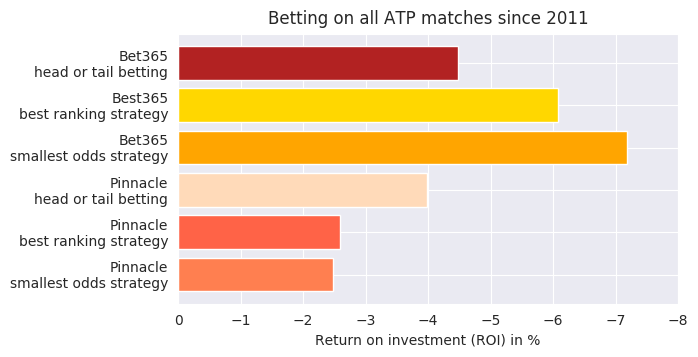

In [ ]:
roi_smallest_odd_ps=100*(data_sel.PSW[data_sel.PSW<data_sel.PSL].sum()-len(data_sel))/len(data_sel)
roi_best_ranking_ps=100*(data_sel.PSW[data_sel.WRank<data_sel.LRank].sum()-len(data_sel))/len(data_sel)
roi_random_ps=100*(data_sel.sample(int(len(data_sel)/2)).PSW.sum()-len(data_sel))/len(data_sel)
roi_smallest_odd_365=100*(data_sel.B365W[data_sel.B365W<data_sel.B365L].sum()-len(data_sel))/len(data_sel)
roi_best_ranking_365=100*(data_sel.B365W[data_sel.WRank<data_sel.LRank].sum()-len(data_sel))/len(data_sel)
roi_random_365=100*(data_sel.sample(int(len(data_sel)/2)).PSW.sum()-len(data_sel))/len(data_sel)
values=[roi_smallest_odd_ps,roi_best_ranking_ps,roi_random_ps,
        roi_smallest_odd_365,roi_best_ranking_365,roi_random_365]
labels=["Pinnacle\nsmallest odds strategy","Pinnacle\nbest ranking strategy","Pinnacle\nhead or tail betting",
       "Bet365\nsmallest odds strategy","Best365\nbest ranking strategy","Bet365\nhead or tail betting"]
xaxis_label="Return on investment (ROI) in %"
title="Betting on all ATP matches since 2011"
basic_horizontal_barplot(values,labels,xaxis_label,title,[0,-8],(5,3))

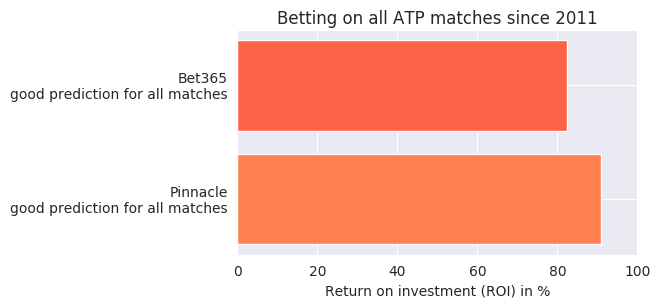

In [ ]:
## Maximum possible ROI
max_roi_ps=100*(data_sel.PSW.sum()-len(data_sel))/len(data_sel)
max_roi_365=100*(data_sel.B365W.sum()-len(data_sel))/len(data_sel)
values=[max_roi_ps,max_roi_365]
labels=["Pinnacle\ngood prediction for all matches","Bet365\ngood prediction for all matches"]
xaxis_label="Return on investment (ROI) in %"
title="Betting on all ATP matches since 2011"
basic_horizontal_barplot(values,labels,xaxis_label,title,[0,100],(4,2.5))

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
31259,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,De Bakker T.,40,43,2.0,0.0,Completed,2.12,1.79,1.90,1.80,1625.972079,1630.416835,0.493604
31260,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Lopez F.,Petzschner P.,32,57,2.0,0.0,Completed,1.67,2.33,1.53,2.37,1686.769657,1650.110377,0.552562
31261,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Bubka S.,Gimeno-Traver D.,321,56,2.0,0.0,Completed,4.55,1.24,3.75,1.25,1505.559837,1616.312065,0.345803
31262,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Marchenko I.,Zverev M.,81,82,2.0,0.0,Completed,1.79,2.13,1.61,2.20,1565.414866,1608.319129,0.438568
31263,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Davydenko N.,Fognini F.,22,55,2.0,0.0,Completed,1.21,4.96,1.14,5.00,1793.948873,1560.081372,0.793516


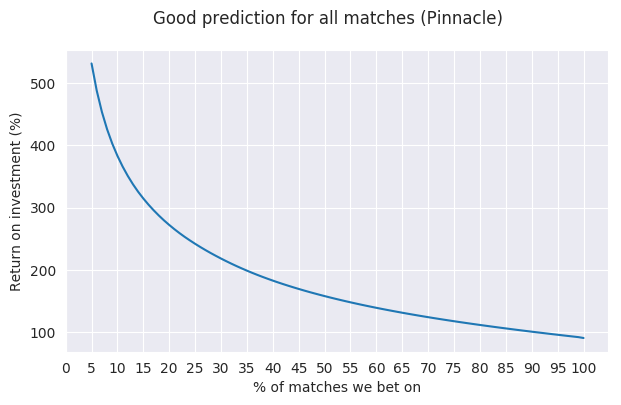

,date,PSW,PSL,win0,confidence0
31259,2011-01-02,2.12,1.79,1,2.12
31260,2011-01-02,1.67,2.33,1,1.67
31261,2011-01-03,4.55,1.24,1,4.55
31262,2011-01-03,1.79,2.13,1,1.79
31263,2011-01-03,1.21,4.96,1,1.21


In [ ]:
perfect_conf=pd.concat([data_sel[["Date","PSW","PSL"]]],1)
perfect_conf["win0"]=[1]*len(perfect_conf)
perfect_conf["confidence0"]=perfect_conf.PSW
perfect_conf=perfect_conf.rename(columns={"Date":"date"})
plotProfits(perfect_conf,"Good prediction for all matches (Pinnacle)")


In [ ]:
# Our predictions + confidence level + if we were right or not
conf=pd.read_csv("confidence_data.csv")
print("Total number of matches predicted : "+str(len(conf)))


Total number of matches predicted : 8421


In [ ]:
conf.iloc[:5,:]

,match,PSW,win0,confidence0,date
0,17279,4.85,1,2.577678,2015-05-27
1,20243,3.50,1,2.147515,2016-07-04
2,18869,1.55,0,2.004695,2016-01-25
3,17529,3.40,1,1.985376,2015-06-29
4,15106,3.26,1,1.980060,2013-07-15


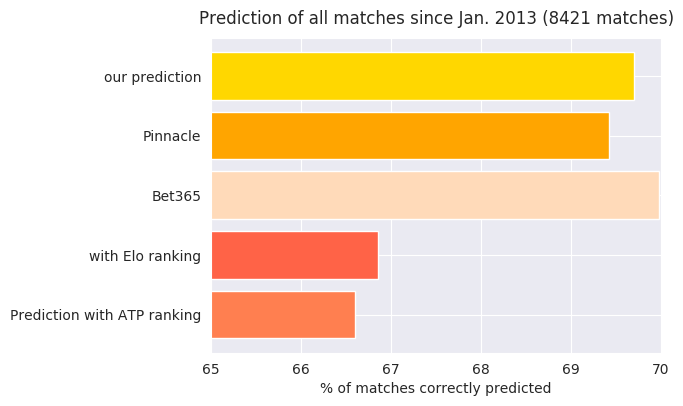

In [ ]:
# Comparison of different techniques for the winner prediction
# Interval for the comparison : [beg,end]
beg=datetime(2013,1,1)
end=data.Date.iloc[-1]
indices=data[(data.Date>=beg)&(data.Date<=end)].index
# classical ATP ranking
test=data[["WRank","LRank"]].iloc[indices,:]
atp=100*(test.LRank>test.WRank).sum()/len(indices)
# Elo ranking
test=data.iloc[indices,:]
elo=100*(test.elo_winner>test.elo_loser).sum()/len(indices)

# Bookmakers
test=data.iloc[indices,:]
book_pi=100*(test.PSW<test.PSL).sum()/len(indices)
book_365=100*(test.B365W<test.B365L).sum()/len(indices)
# Our prediction
our=100*conf.win0.sum()/len(conf)
# Plot
labels=["Prediction with ATP ranking","with Elo ranking",
        "Bet365","Pinnacle",
        "our prediction"]
values=[atp,elo,book_pi,book_365,our]
xaxis_label="% of matches correctly predicted"
title="Prediction of all matches since Jan. 2013 ("+str(len(indices))+" matches)"
xlim=[65,70]
basic_horizontal_barplot(values,labels,xaxis_label,title,xlim,figsize=(4.5,3.5))

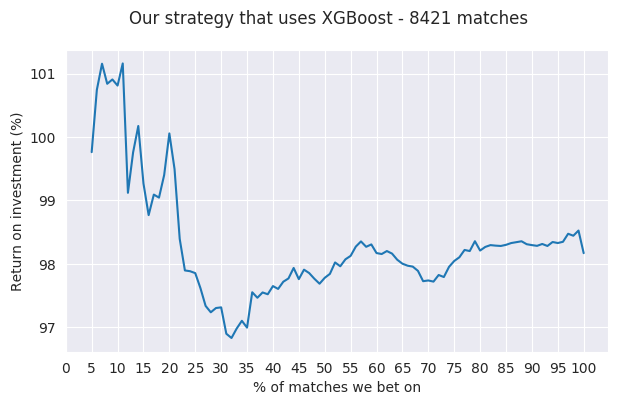

In [ ]:
plotProfits(conf,title="Our strategy that uses XGBoost - "+str(len(conf))+" matches")

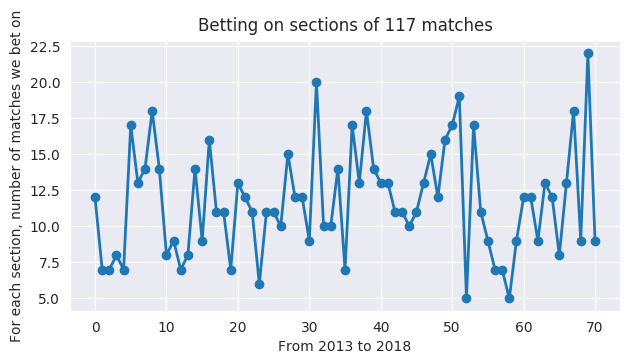

In [ ]:
#esto indicaria en el numero de partidos que apostaríamos cada 117 partidos que es el equivalente a un grand slam

confconf=conf.iloc[:int(0.1*len(conf)),:]
profits,lens=profitsAlongTime(confconf,117)
fig=plt.figure(figsize=(5.5,3),dpi=100)
ax = fig.add_axes([0,0,1,0.9])  
ax.plot(lens,linewidth=2,marker="o")
plt.suptitle("Betting on sections of 117 matches")
ax.set_xlabel("From 2013 to 2018")
ax.set_ylabel("For each section, number of matches we bet on")
plt.show()

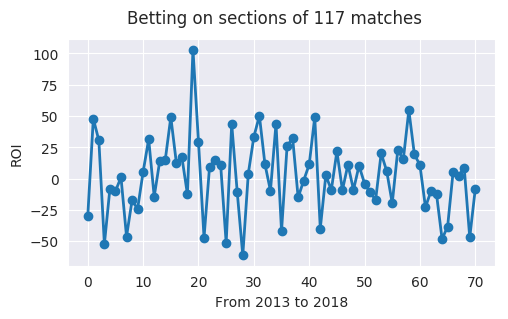

In [ ]:
#esta parte nos enseña el ROI que se produciria apostando en esos partidos
conf10=conf.iloc[:int(0.1*len(conf)),:]
profits,lens=profitsAlongTime(conf10,117)
fig=plt.figure(figsize=(5.5,3),dpi=100)
plt.plot(profits,linewidth=2,marker="o")
plt.suptitle("Betting on sections of 117 matches")
plt.xlabel("From 2013 to 2018")
plt.ylabel("ROI")
plt.show()

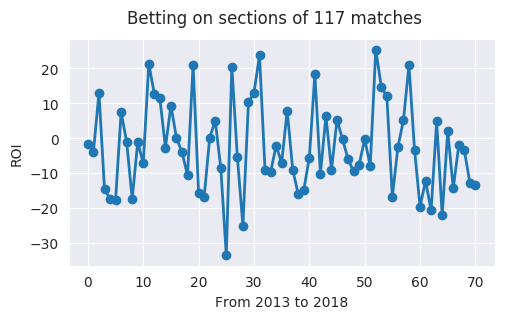

In [ ]:
confconf=conf.iloc[:int(0.35*len(conf)),:]
profits,lens=profitsAlongTime(confconf,117)
fig=plt.figure(figsize=(5.5,3),dpi=100)
plt.plot(profits,linewidth=2,marker="o")
plt.suptitle("Betting on sections of 117 matches")
plt.xlabel("From 2013 to 2018")
plt.ylabel("ROI")
plt.show()

In [ ]:
print("Standard deviation : "+str(round(profits.std(),1)))
print("Media : "+str(round(profits.mean(),1)))

Standard deviation : 12.8
Media : -2.5


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
from datetime import timedelta

from past_features import *
from elo_features import *
from categorical_features import *
from stategy_assessment import *
from utilities import *



################################################################################
######################### Building of the raw dataset ##########################
################################################################################

### Importation of the Excel files - 1 per year (from tennis.co.uk)
# Some preprocessing is necessary because for several years the odds are not present
# We consider only the odds of Bet365 and Pinnacle.

import glob
filenames=list(glob.glob("../Data/20*.xls*"))
l = [pd.read_excel(filename,encoding='latin-1') for filename in filenames]
no_b365=[i for i,d in enumerate(l) if "B365W" not in l[i].columns]
no_pi=[i for i,d in enumerate(l) if "PSW" not in l[i].columns]
for i in no_pi:
    l[i]["PSW"]=np.nan
    l[i]["PSL"]=np.nan
for i in no_b365:
    l[i]["B365W"]=np.nan
    l[i]["B365L"]=np.nan
l=[d[list(d.columns)[:13]+["Wsets","Lsets","Comment"]+["PSW","PSL","B365W","B365L"]] for d in [l[0]]+l[2:]]
data=pd.concat(l,0)

### Data cleaning
data=data.sort_values("Date")
data["WRank"]=data["WRank"].replace(np.nan,0)
data["WRank"]=data["WRank"].replace("NR",2000)
data["LRank"]=data["LRank"].replace(np.nan,0)
data["LRank"]=data["LRank"].replace("NR",2000)
data["WRank"]=data["WRank"].astype(int)
data["LRank"]=data["LRank"].astype(int)
data["Wsets"]=data["Wsets"].astype(float)
data["Lsets"]=data["Lsets"].replace("`1",1)
data["Lsets"]=data["Lsets"].astype(float)
data=data.reset_index(drop=True)

### Elo rankings data
# Computing of the elo ranking of each player at the beginning of each match.
elo_rankings = compute_elo_rankings(data)
data = pd.concat([data,elo_rankings],1)

### Storage of the raw dataset
data.to_csv("../Generated Data/wta_data.csv",index=False)



################################################################################
######################## Building training set #################################
################################################################################
### We'll add some features to the dataset

data=pd.read_csv("../Generated Data/wta_data.csv")
data.Date = pd.to_datetime(data.Date)
##con este cambio funciona perfectamente
#data.Date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))


######################### The period that interests us #########################

beg = datetime.datetime(2008,1,1) 
end = data.Date.iloc[-1]
indices = data[(data.Date>beg)&(data.Date<=end)].index

#prueba, tocará eliminar
print(indices)

################### Building of some features based on the past ################
print("features_player")
features_player  = features_past_generation(features_player_creation,5,"playerft5",data,indices)
print("features_duo")
features_duo     = features_past_generation(features_duo_creation,150,"duoft",data,indices)
print("features_general")
features_general = features_past_generation(features_general_creation,150,"generalft",data,indices)
print("features_recent")
features_recent  = features_past_generation(features_recent_creation,150,"recentft",data,indices)

#el dump es para guardar y el load para cargar,  lo que inicialmente el dump la variable están escritas al reves
#dump(features_player,"features_player")
#dump(features_duo,"features_duo")
#dump(features_general,"features_general")
#dump(features_recent,"features_recent")
#features_player=load("player_features")
#features_duo=load("duo_features")
#features_general=load("general_features")
#features_recent=load("recent_features")

########################### Selection of our period ############################

data = data.iloc[indices,:].reset_index(drop=True)
odds = data[["PSW","PSL"]]

########################## Encoding of categorical features ####################

features_categorical = data[["Tier","Court","Surface","Round","Best of","Tournament"]]
features_categorical_encoded = categorical_features_encoding(features_categorical)
players_encoded = features_players_encoding(data)
tournaments_encoded = features_tournaments_encoding(data)
features_onehot = pd.concat([features_categorical_encoded,players_encoded,tournaments_encoded],1)


############################### Duplication of rows ############################
## For the moment we have one row per match. 
## We "duplicate" each row to have one row for each outcome of each match. 
## Of course it isn't a simple duplication of  each row, we need to "invert" some features

# Elo data
elo_rankings = data[["elo_winner","elo_loser","proba_elo"]]
elo_1 = elo_rankings
elo_2 = elo_1[["elo_loser","elo_winner","proba_elo"]]
elo_2.columns = ["elo_winner","elo_loser","proba_elo"]
elo_2.proba_elo = 1-elo_2.proba_elo
elo_2.index = range(1,2*len(elo_1),2)
elo_1.index = range(0,2*len(elo_1),2)
features_elo_ranking = pd.concat([elo_1,elo_2]).sort_index(kind='merge')

# Categorical features
features_onehot = pd.DataFrame(np.repeat(features_onehot.values,2, axis=0),columns=features_onehot.columns)

# odds feature
features_odds = pd.Series(odds.values.flatten(),name="odds")
features_odds = pd.DataFrame(features_odds)

### Building of the final dataset
# You can remove some features to see the effect on the ROI
features = pd.concat([features_odds,
                  features_elo_ranking,
                  features_onehot,
                  features_player,
                  features_duo,
                  features_general,
                  features_recent],1)

features.to_csv("../Generated Data/wta_data_features.csv",index=False)





################################################################################
#################### Strategy assessment - ROI computing #######################
################################################################################

## We adopt a sliding window method. We predict the outcome of delta consecutive matches , 
## with the N previous matches. A small subset of the training set is devoted to
## validation (the consecutive matches right before the testing matches)

######################### Confidence computing for each match ############################
features=pd.read_csv("../Generated Data/wta_data_features.csv")
#### aqui está el próximo error a corregir
start_date=datetime.datetime(2013,1,1) #first day of testing set
test_beginning_match=data[data.Date==start_date].index[0] #id of the first match of the testing set
span_matches=len(data)-test_beginning_match+1
duration_val_matches=300
duration_train_matches=10400
duration_test_matches=2000

## Number of tournaments and players encoded directly in one-hot 
nb_players=50
nb_tournaments=5

## XGB parameters
learning_rate=[0.295] 
max_depth=[19]
min_child_weight=[1]
gamma=[0.8]
csbt=[0.5]
lambd=[0]
alpha=[2]
num_rounds=[300]
early_stop=[5]
params=np.array(np.meshgrid(learning_rate,max_depth,min_child_weight,gamma,csbt,lambd,alpha,num_rounds,early_stop)).T.reshape(-1,9).astype(np.float)
xgb_params=params[0]


## We predict the confidence in each outcome, "duration_test_matches" matches at each iteration
key_matches=np.array([test_beginning_match+duration_test_matches*i for i in range(int(span_matches/duration_test_matches)+1)])
confs=[]
for start in key_matches:
    conf=vibratingAssessStrategyGlobal(start,10400,duration_val_matches,duration_test_matches,xgb_params,nb_players,nb_tournaments,features,data)
    confs.append(conf)
confs=[el for el in confs if type(el)!=int]
conf=pd.concat(confs,0)
## We add the date to the confidence dataset (can be useful for analysis later)
dates=data.Date.reset_index()
dates.columns=["match","date"]
conf=conf.merge(dates,on="match")
conf=conf.sort_values("confidence0",ascending=False)
conf=conf.reset_index(drop=True)


## We store this dataset
conf.to_csv("../Generated Data/confidence_data.csv",index=False)

## Plot of ROI according to the % of matches we bet on
plotProfits(conf,"Test on the period Jan. 2013 -> March 2018")




################################################################################
######################### ROI variability along time ###########################
################################################################################

## We bet only on 35% of the matches
confconf=conf.iloc[:int(0.35*len(conf)),:]

def profitsAlongTime(conf,matches_delta):
    span_matches=span_matches=conf.match.max()-conf.match.min()-1
    N=int(span_matches/matches_delta)+1
    milestones=np.array([conf.match.min()+matches_delta*i for i in range(N)])
    profits=[]
    lens=[]
    for i in range(N-1):
        beg=milestones[i]
        end=milestones[i+1]-1
        conf_sel=confconf[(conf.match>=beg)&(conf.match<=end)]
        l=len(conf_sel)
        lens.append(l)
        if l==0:
            profits.append(0)
        else:    
            p=profitComputation(100,conf_sel)
            profits.append(p)
    profits=np.array(profits)
    return profits,lens

matches_delta=117
profits,lens=profitsAlongTime(confconf,matches_delta)

fig=plt.figure(figsize=(5.5,3))
ax = fig.add_axes([0,0,1,0.9])  
ax.plot(profits,linewidth=2,marker="o")
plt.suptitle("Betting on sections of 100 matches")
ax.set_xlabel("From 2013 to 2018")
ax.set_ylabel("ROI")

fig=plt.figure(figsize=(5.5,3))
ax = fig.add_axes([0,0,1,0.9])  
ax.plot(lens,linewidth=2,marker="o")
plt.suptitle("Betting on sections of 100 matches")
ax.set_xlabel("From 2013 to 2018")
ax.set_ylabel("For each section, number of matches we bet on")


Elo rankings computing...
5000 matches computed...
10000 matches computed...
15000 matches computed...
20000 matches computed...
25000 matches computed...
Int64Index([], dtype='int64')
features_player
features_duo
features_general
features_recent


ValueError: ignored

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import datetime

###################### FEATURES BASED ON THE PAST OF THE PLAYERS ###############

def features_past_generation(features_creation_function,
                             days,
                             feature_names_prefix,
                             data,
                             indices):
  #  """
  #  Creates features based on the past of the players. 
  #  Basically a for loop. Takes 1 match at a time, selects the matches that occurred during 
  #  its close past (usually 150 days before max) and computes some features.
  #  Each match will appear twice in the dataset : 1 time per outcome of the match.
   # Example : 02/03/2016 Djoko-Zverev ,Djoko won
    #    During the 150 days before the match, Djoko won 80% of its matches and Zverev 40%.
     #   We encode the outcome "Djoko wins" like that : [80,40], and tell the model this outcome happened (1).
    #    We encode the outcome "Zverev wins" like that : [40,80], and tell the model it didn't happen (0).
#    And we do that with some more features , based on the players past stats on the surface
 #   of the match, on the recent injuries, ...
  #  In the inputs of the function, "indices" contains the indices of the matches we want to encode.
    #The output of the functions is twice as long as "indices".
    #(these features introduce many hyperparameters to be tuned...)
   # """
    matches_outcomes=[]
    print("featurer player 2")
    for i,match_indice in enumerate(indices):
        match=data.iloc[match_indice,:]
        past_matches=data[(data.Date<match.Date)&(data.Date>=match.Date-datetime.timedelta(days=days))]
        match_features_outcome_1=features_creation_function(1,match,past_matches)
        match_features_outcome_2=features_creation_function(2,match,past_matches)
        matches_outcomes.append(match_features_outcome_1)
        matches_outcomes.append(match_features_outcome_2)
        if i%500==0:
            print(str(i)+"/"+str(len(indices))+" matches treated.")
    train=pd.DataFrame(matches_outcomes)
    train.columns=[feature_names_prefix+str(i) for i in range(len(train.columns))]
    return train


def features_player_creation(outcome,match,past_matches):
    
    features_player=[]
    ##### Match information extraction (according to the outcome)
    player=match.Winner if outcome==1 else match.Loser
    surface=match.Surface
    ##### General stats
    wins=past_matches[past_matches.Winner==player]    
    losses=past_matches[past_matches.Loser==player]    
    todo=pd.concat([wins,losses],0)
    features_player+=[len(wins),len(losses),len(todo)]
    per_victory=100*len(wins)/len(todo) if len(todo)>0 else np.nan
    features_player.append(per_victory)
    ##### Surface
    past_surface=past_matches[past_matches.Surface==surface]
    wins_surface=past_surface[past_surface.Winner==player]    
    losses_surface=past_surface[past_surface.Loser==player]    
    todo_surface=pd.concat([wins_surface,losses_surface],0)
    features_player+=[len(wins_surface),len(losses_surface),len(todo_surface)]
    per_victory_surface=100*len(wins_surface)/len(todo_surface) if len(todo_surface)>0 else np.nan
    features_player.append(per_victory_surface)
    return features_player

def features_recent_creation(outcome,match,past_matches):
    ##### Match information extraction (according to the outcome)
    player=match.Winner if outcome==1 else match.Loser
    date=match.Date
    ##### Last matches
    wins=past_matches[past_matches.Winner==player]    
    losses=past_matches[past_matches.Loser==player]    
    todo=pd.concat([wins,losses],0)
    if len(todo)==0:
        return [np.nan]*7
    # Days since last match
    dslm=(date-todo.iloc[-1,:].Date).days
    # Was the last match won ?
    wlmw=int(todo.iloc[-1,:].Winner==player)
    # Ranking of the last player played
    rlpp=todo.iloc[-1,:].WRank
    # Number of sets of last match played
    nslmp=todo.iloc[-1,:]['Best of']
    # Number of sets won during last match played
    nswlmp=todo.iloc[-1,:]['Wsets'] if wlmw==1 else todo.iloc[-1,:]['Lsets']
    # Injuries - iitp + injury last match
    if len(losses)!=0:
        ilm=int(losses.iloc[-1,:].Comment=="Completed")
        iitp=1 if (losses.Comment!="Completed").sum()>0 else 0
    else:
        ilm=np.nan
        iitp=np.nan
    features_recent=[dslm,wlmw,rlpp,nslmp,nswlmp,ilm,iitp]
    return features_recent

def features_duo_creation(outcome,match,past):
    features_duo=[]
    ##### Match information extraction (according to the outcome)
    player1=match.Winner if outcome==1 else match.Loser
    player2=match.Loser if outcome==1 else match.Winner
    ##### General duo features
    # % of the previous matches between these 2 players won by each.
    duo1=past[(past.Winner==player1)&(past.Loser==player2)]    
    duo2=past[(past.Winner==player2)&(past.Loser==player1)]    
    duo=pd.concat([duo1,duo2],0)
    features_duo+=[len(duo),len(duo1),len(duo2)]
    per_victory_player1=100*len(duo1)/len(duo) if len(duo)>0 else np.nan
    features_duo.append(per_victory_player1)
    return features_duo

def features_general_creation(outcome,match,past_matches):
    features_general=[]
    ##### Match information extraction (according to the outcome)
    player1=match.Winner if outcome==1 else match.Loser
    rank_player_1=match.WRank if outcome==1 else match.LRank
    rank_player_2=match.LRank if outcome==1 else match.WRank
    
    features_general+=[rank_player_1,rank_player_2,
                       rank_player_2-rank_player_1,
                       int(rank_player_1>rank_player_2)]
    best_ranking_as_winner=past_matches[(past_matches.Winner==player1)].WRank.min()
    best_ranking_as_loser=past_matches[(past_matches.Loser==player1)].LRank.min()
    best_ranking=min(best_ranking_as_winner,best_ranking_as_loser)
    features_general.append(best_ranking)
    return features_general

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

def compute_elo_rankings(data):
    """
    Given the list on matches in chronological order, for each match, computes 
    the elo ranking of the 2 players at the beginning of the match
    
    """
    print("Elo rankings computing...")
    players=list(pd.Series(list(data.Winner)+list(data.Loser)).value_counts().index)
    elo=pd.Series(np.ones(len(players))*1500,index=players)
    ranking_elo=[(1500,1500)]
    for i in range(1,len(data)):
        w=data.iloc[i-1,:].Winner
        l=data.iloc[i-1,:].Loser
        elow=elo[w]
        elol=elo[l]
        pwin=1 / (1 + 10 ** ((elol - elow) / 400))    
        K_win=32
        K_los=32
        new_elow=elow+K_win*(1-pwin)
        new_elol=elol-K_los*(1-pwin)
        elo[w]=new_elow
        elo[l]=new_elol
        ranking_elo.append((elo[data.iloc[i,:].Winner],elo[data.iloc[i,:].Loser])) 
        if i%5000==0:
            print(str(i)+" matches computed...")
    ranking_elo=pd.DataFrame(ranking_elo,columns=["elo_winner","elo_loser"])    
    ranking_elo["proba_elo"]=1 / (1 + 10 ** ((ranking_elo["elo_loser"] - ranking_elo["elo_winner"]) / 400))   
    return ranking_elo


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

############################### CATEGORICAL FEATURES ENCODING ##################

### The features "player1", "player2" and "Tournament" are treated differently
### from the other features. 

def categorical_features_encoding(cat_features):
    """
    Categorical features encoding.
    Simple one-hot encoding.
    """
    cat_features=cat_features.apply(preprocessing.LabelEncoder().fit_transform)
    ohe=OneHotEncoder()
    cat_features=ohe.fit_transform(cat_features)
    cat_features=pd.DataFrame(cat_features.todense())
    cat_features.columns=["cat_feature_"+str(i) for i in range(len(cat_features.columns))]
    cat_features=cat_features.astype(int)
    return cat_features

def features_players_encoding(data):
    """
    Encoding of the players . 
    The players are not encoded like the other categorical features because for each
    match we encode both players at the same time (we put a 1 in each row corresponding 
    to the players playing the match for each match).
    """
    winners=data.Winner
    losers=data.Loser
    le = preprocessing.LabelEncoder()
    le.fit(list(winners)+list(losers))
    winners=le.transform(winners)
    losers=le.transform(losers)
    encod=np.zeros([len(winners),len(le.classes_)])
    for i in range(len(winners)):
        encod[i,winners[i]]+=1
    for i in range(len(losers)):
        encod[i,losers[i]]+=1
    columns=["player_"+el for el in le.classes_]
    players_encoded=pd.DataFrame(encod,columns=columns)
    return players_encoded

def features_tournaments_encoding(data):
    """
    Encoding of the tournaments . 
    """
    tournaments=data.Tournament
    le = preprocessing.LabelEncoder()
    tournaments=le.fit_transform(tournaments)
    encod=np.zeros([len(tournaments),len(le.classes_)])
    for i in range(len(tournaments)):
        encod[i,tournaments[i]]+=1
    columns=["tournament_"+el for el in le.classes_]
    tournaments_encoded=pd.DataFrame(encod,columns=columns)
    return tournaments_encoded